<a href="https://colab.research.google.com/github/sandeshghule/generativeAI/blob/main/Assignment1/CalforniaHousingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

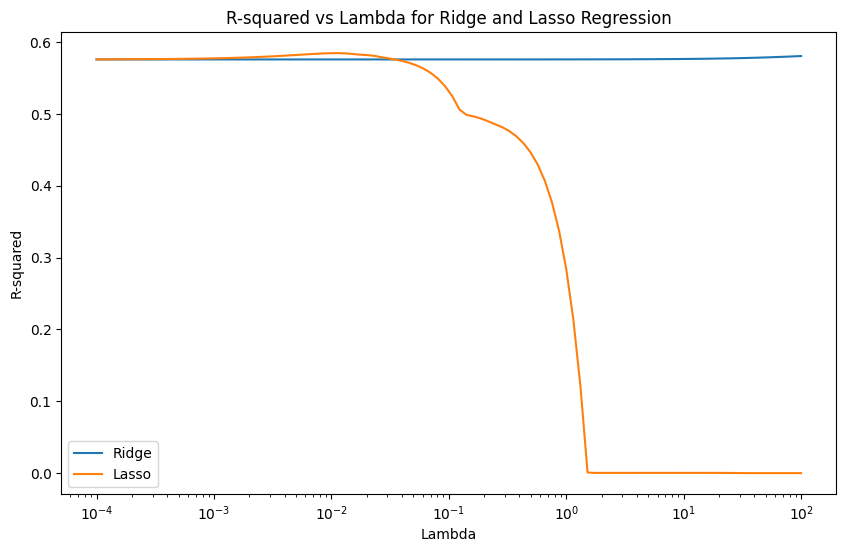

Linear Regression R-squared on test data: 0.5757877060324508
Best Ridge R-squared on test data (lambdas[99]= 100.0000): 0.5805278207071454
Best Lasso R-squared on test data (lambdas[34]= 0.0115): 0.5845812424895025


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

# Stap 1. Fetch California Housing data
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# Prepare data
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)


# Apply Ridge and Lasso Regression for different lambda values
lambdas = np.logspace(-4, 2, 100)
ridge_scores = []
lasso_scores = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train, y_train)
    ridge_scores.append(ridge.score(X_test, y_test))

    lasso = Lasso(alpha=l)
    lasso.fit(X_train, y_train)
    lasso_scores.append(lasso.score(X_test, y_test))

# 5. Plot cost vs. lambda for Ridge and Lasso
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_scores, label='Ridge')
plt.plot(lambdas, lasso_scores, label='Lasso')
plt.xlabel('Lambda')
plt.ylabel('R-squared')
plt.xscale('log')  # Use logarithmic scale for lambda
plt.title('R-squared vs Lambda for Ridge and Lasso Regression')
plt.legend()
plt.show()


# Print R-squared scores for all three models on test data (7.)

print("Linear Regression R-squared on test data:", linear_reg.score(X_test, y_test))

# Find the best lambda values and corresponding scores for ridge and lasso
best_ridge_index = np.argmax(ridge_scores)
best_lasso_index = np.argmax(lasso_scores)

print(f"Best Ridge R-squared on test data (lambdas[{best_ridge_index}]= {lambdas[best_ridge_index]:.4f}):", ridge_scores[best_ridge_index])
print(f"Best Lasso R-squared on test data (lambdas[{best_lasso_index}]= {lambdas[best_lasso_index]:.4f}):", lasso_scores[best_lasso_index])